In [21]:
# Data discretization / Bining 

# Diskritisasi adalah kegiatan yang dilakukan untuk mengubah tipe data nilai numerik menjadi kategorik yang memiliki tingkatan, seperti besar-kecil, tinggi, sedang, rendah dan lain-lain.
# Kenapa perlu melakukan diskritisasi pada kondisi tertentu? karena data  numerik rawan dengan nilai outlier yang akan menyulitkan dalam perhitungan. Misalnya ada data nilai kebanyakan data itu nilainya 60-70 kemudian dalam kelompok data tersebut muncul nilai 90 atau bahkan 100. jika kita ambil rata-rata dengan mean (seperti  pada kasus data set yang saya kaji), maka nilai rata-rata yang dihasilkan tidak akan optimal dan ini akan menjadi distribusi data menjadi kacau. seperti halnya pada kasus data set yang sedang saya analisis. dimana ketikaa dilakuakan analisis multivariate (pada file exploration.ipynb) data nilai yang muncul berkisar pada 60-70 padahal ada nilai 90 bahkan 100 sehingga sehingga tidak ideal untuk dianalisis. bisa kita coba lagi analisis multivariate dengan data  numerik yang belum di bining.

import pandas as  pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

print ('berhasil import')


berhasil import


In [22]:
df = pd.read_csv('../data/spf.csv')
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,College,Near,Female,70


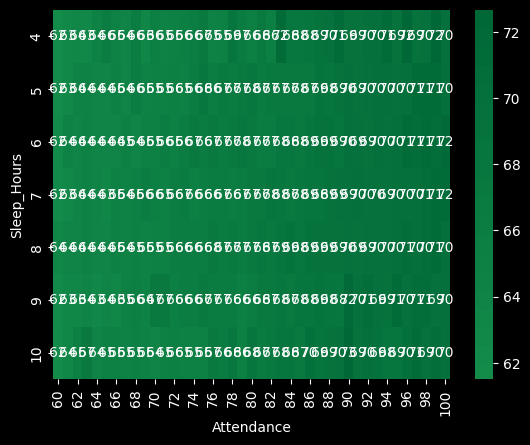

In [23]:
result = pd.pivot_table(data = df, values='Exam_Score', index ='Sleep_Hours', columns = 'Attendance')

sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

In [24]:
# sisi paling kanan itu adalah mean dari exam_score yang dikorealsikan dengan dua atribut lain, dimana yang muncul itu tentu adalah mean yang masalahnya terjadi distribusi data yang kacau dimana nilai tertinggi tidak  memiliki gambaran atas korelasi tiga atribut tersebut. sebenaranya  bisa saja untuk melihat tidak berdasarkan mean tapi berdasarkan max, min, sum dengan menentukan aggfunc = 'min', 'max' dll, tapi tetap tidak  efisien untuk  mewakili secara garis  besar dari data frame. jika hendak mempertimbangkan beberapa atribut diatas itu perlu dikorealsikan padahal datanya adalah numerik maka perlu unntuk melakukan bining agar tidak kacau.
# perbedaan mendasar penggunaan data  numerik dan data kategorik sebenarnya sudah dicontohkan pada file exploration.ipynb, dimana data kategorik  akan mudah dibaca dan dianalisis sedangkan data numerik bisa dilihat sendiri.

# mungkin meyakinkan bahwa data exam_score punya beberapa nilai diatas 70 bahkan 100, bisa dicek lagi  describe dari atribut exam score
kolom = ['Exam_Score']
desc_exam = pd.DataFrame (df, columns = kolom)

print (desc_exam.describe())


        Exam_Score
count  6378.000000
mean     67.252117
std       3.914217
min      55.000000
25%      65.000000
50%      67.000000
75%      69.000000
max     101.000000


1. Bining dengan ketentuan subjektif/manual

In [25]:
# pada proses ini, perlu library scikit learn class pipeline. import terlebih dahulu karena sebelumnya belum diimport

from sklearn.pipeline import Pipeline

print ('import aman')


import aman


In [26]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,College,Near,Female,70


In [27]:
batas_bin = [0, 50, 75, 102]

In [28]:
kategori = ['Rendah', 'Sedang', 'Tinggi']

In [29]:
df['score_binned_manual']=pd.cut(df['Exam_Score'], bins=batas_bin, labels=kategori)
df.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,score_binned_manual
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,High School,Near,Male,67,Sedang
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,College,Moderate,Female,61,Sedang
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,Postgraduate,Near,Male,74,Sedang
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,High School,Moderate,Male,71,Sedang
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,College,Near,Female,70,Sedang
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,Postgraduate,Near,Male,71,Sedang
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,High School,Moderate,Male,67,Sedang
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,High School,Far,Male,66,Sedang
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,College,Near,Male,69,Sedang
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,High School,Moderate,Male,72,Sedang


In [30]:
print (df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
score_binned_manual           0
dtype: int64


# 2. Bining dengan Linspace



In [31]:
bins = np.linspace(min(df['Exam_Score']), max(df['Exam_Score']), 4)
print(bins)

[ 55.          70.33333333  85.66666667 101.        ]


In [32]:
kategori= ['Rendah', 'Sedang', 'Tinggi']

In [33]:
df['score_binned_linspace'] = pd.cut(df['Exam_Score'], bins = bins, labels=kategori, include_lowest=True)

df.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,score_binned_manual,score_binned_linspace
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,High School,Near,Male,67,Sedang,Rendah
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,College,Moderate,Female,61,Sedang,Rendah
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,Postgraduate,Near,Male,74,Sedang,Sedang
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,High School,Moderate,Male,71,Sedang,Sedang
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,College,Near,Female,70,Sedang,Rendah
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,Postgraduate,Near,Male,71,Sedang,Sedang
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,High School,Moderate,Male,67,Sedang,Rendah
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,High School,Far,Male,66,Sedang,Rendah
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,College,Near,Male,69,Sedang,Rendah
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,High School,Moderate,Male,72,Sedang,Sedang


In [34]:
# Dari hasil bining antara  yang subjektif dengan linspace memiliki perbedaan karena memiliki batas bibn yang berbeda. contohnya bisa lihat pada tabel, nilai 67, 69 70 pada bining subjektif itu masuk ke sedang, sedangkan pada bining linspace malah masuk  ke kategori rendah. di linspace batas binsnya 55, 70, 85, 101, sedangkan yang manual atau subjektif batas binnya 0, 50, 75, 102.

3. Bining dengan Quantile

In [35]:
df['score_binned_quantile'] = pd.qcut(df['Exam_Score'],3)
df.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,score_binned_manual,score_binned_linspace,score_binned_quantile
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,High School,Near,Male,67,Sedang,Rendah,"(66.0, 69.0]"
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,College,Moderate,Female,61,Sedang,Rendah,"(54.999, 66.0]"
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,Postgraduate,Near,Male,74,Sedang,Sedang,"(69.0, 101.0]"
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,High School,Moderate,Male,71,Sedang,Sedang,"(69.0, 101.0]"
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,College,Near,Female,70,Sedang,Rendah,"(69.0, 101.0]"
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,...,Medium,Public,Positive,Postgraduate,Near,Male,71,Sedang,Sedang,"(69.0, 101.0]"
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,...,Medium,Private,Neutral,High School,Moderate,Male,67,Sedang,Rendah,"(66.0, 69.0]"
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,...,High,Public,Negative,High School,Far,Male,66,Sedang,Rendah,"(54.999, 66.0]"
8,17,94,Medium,High,No,6,80,High,Yes,0,...,Low,Private,Neutral,College,Near,Male,69,Sedang,Rendah,"(66.0, 69.0]"
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,...,High,Public,Positive,High School,Moderate,Male,72,Sedang,Sedang,"(69.0, 101.0]"


In [ ]:
# sedikit deskripsi dari tabel yang muncul setelah runing kode bining quantile sebelum dikategorikan. melihat dari nilai yang muncul pada golongan atribut score binned quantile, muncul range 54-66, 66-69, dan 69-101 pada score tertentu. sebenarnya kita sudah bisa membaca bahwa range 54-66 itu masuk kategori range nilai rendah karena kita sudah membatasi kategori jadi tiga dan range ini adalah range paling rendah diantara range lain. range 66-69 akan menjadi range sedang dan range  69-101 akan menjadi range pada kategori tinggi. jelas jauh berbeda hasilnya dengan metode-metode  bining sebelumnya. sekilas akan banyak nilai yang masuk dalam kategori tinggi karena batas bin atau range nya turun jadi minimal 69 untuk masuk kategori tinggi.

In [38]:
kategori = ['Rendah', 'Sedang', 'Tinggi']
df['score_binned_quantile'] = pd.qcut(df['Exam_Score'], q=3, labels=kategori)
df.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,score_binned_manual,score_binned_linspace,score_binned_quantile,score_binned_3
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Public,Positive,High School,Near,Male,67,Sedang,Rendah,Sedang,Sedang
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Public,Negative,College,Moderate,Female,61,Sedang,Rendah,Rendah,Rendah
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Public,Neutral,Postgraduate,Near,Male,74,Sedang,Sedang,Tinggi,Tinggi
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Public,Negative,High School,Moderate,Male,71,Sedang,Sedang,Tinggi,Tinggi
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Public,Neutral,College,Near,Female,70,Sedang,Rendah,Tinggi,Tinggi
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,...,Public,Positive,Postgraduate,Near,Male,71,Sedang,Sedang,Tinggi,Tinggi
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,...,Private,Neutral,High School,Moderate,Male,67,Sedang,Rendah,Sedang,Sedang
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,...,Public,Negative,High School,Far,Male,66,Sedang,Rendah,Rendah,Rendah
8,17,94,Medium,High,No,6,80,High,Yes,0,...,Private,Neutral,College,Near,Male,69,Sedang,Rendah,Sedang,Sedang
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,...,Public,Positive,High School,Moderate,Male,72,Sedang,Sedang,Tinggi,Tinggi
